/Users/ifeanyi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


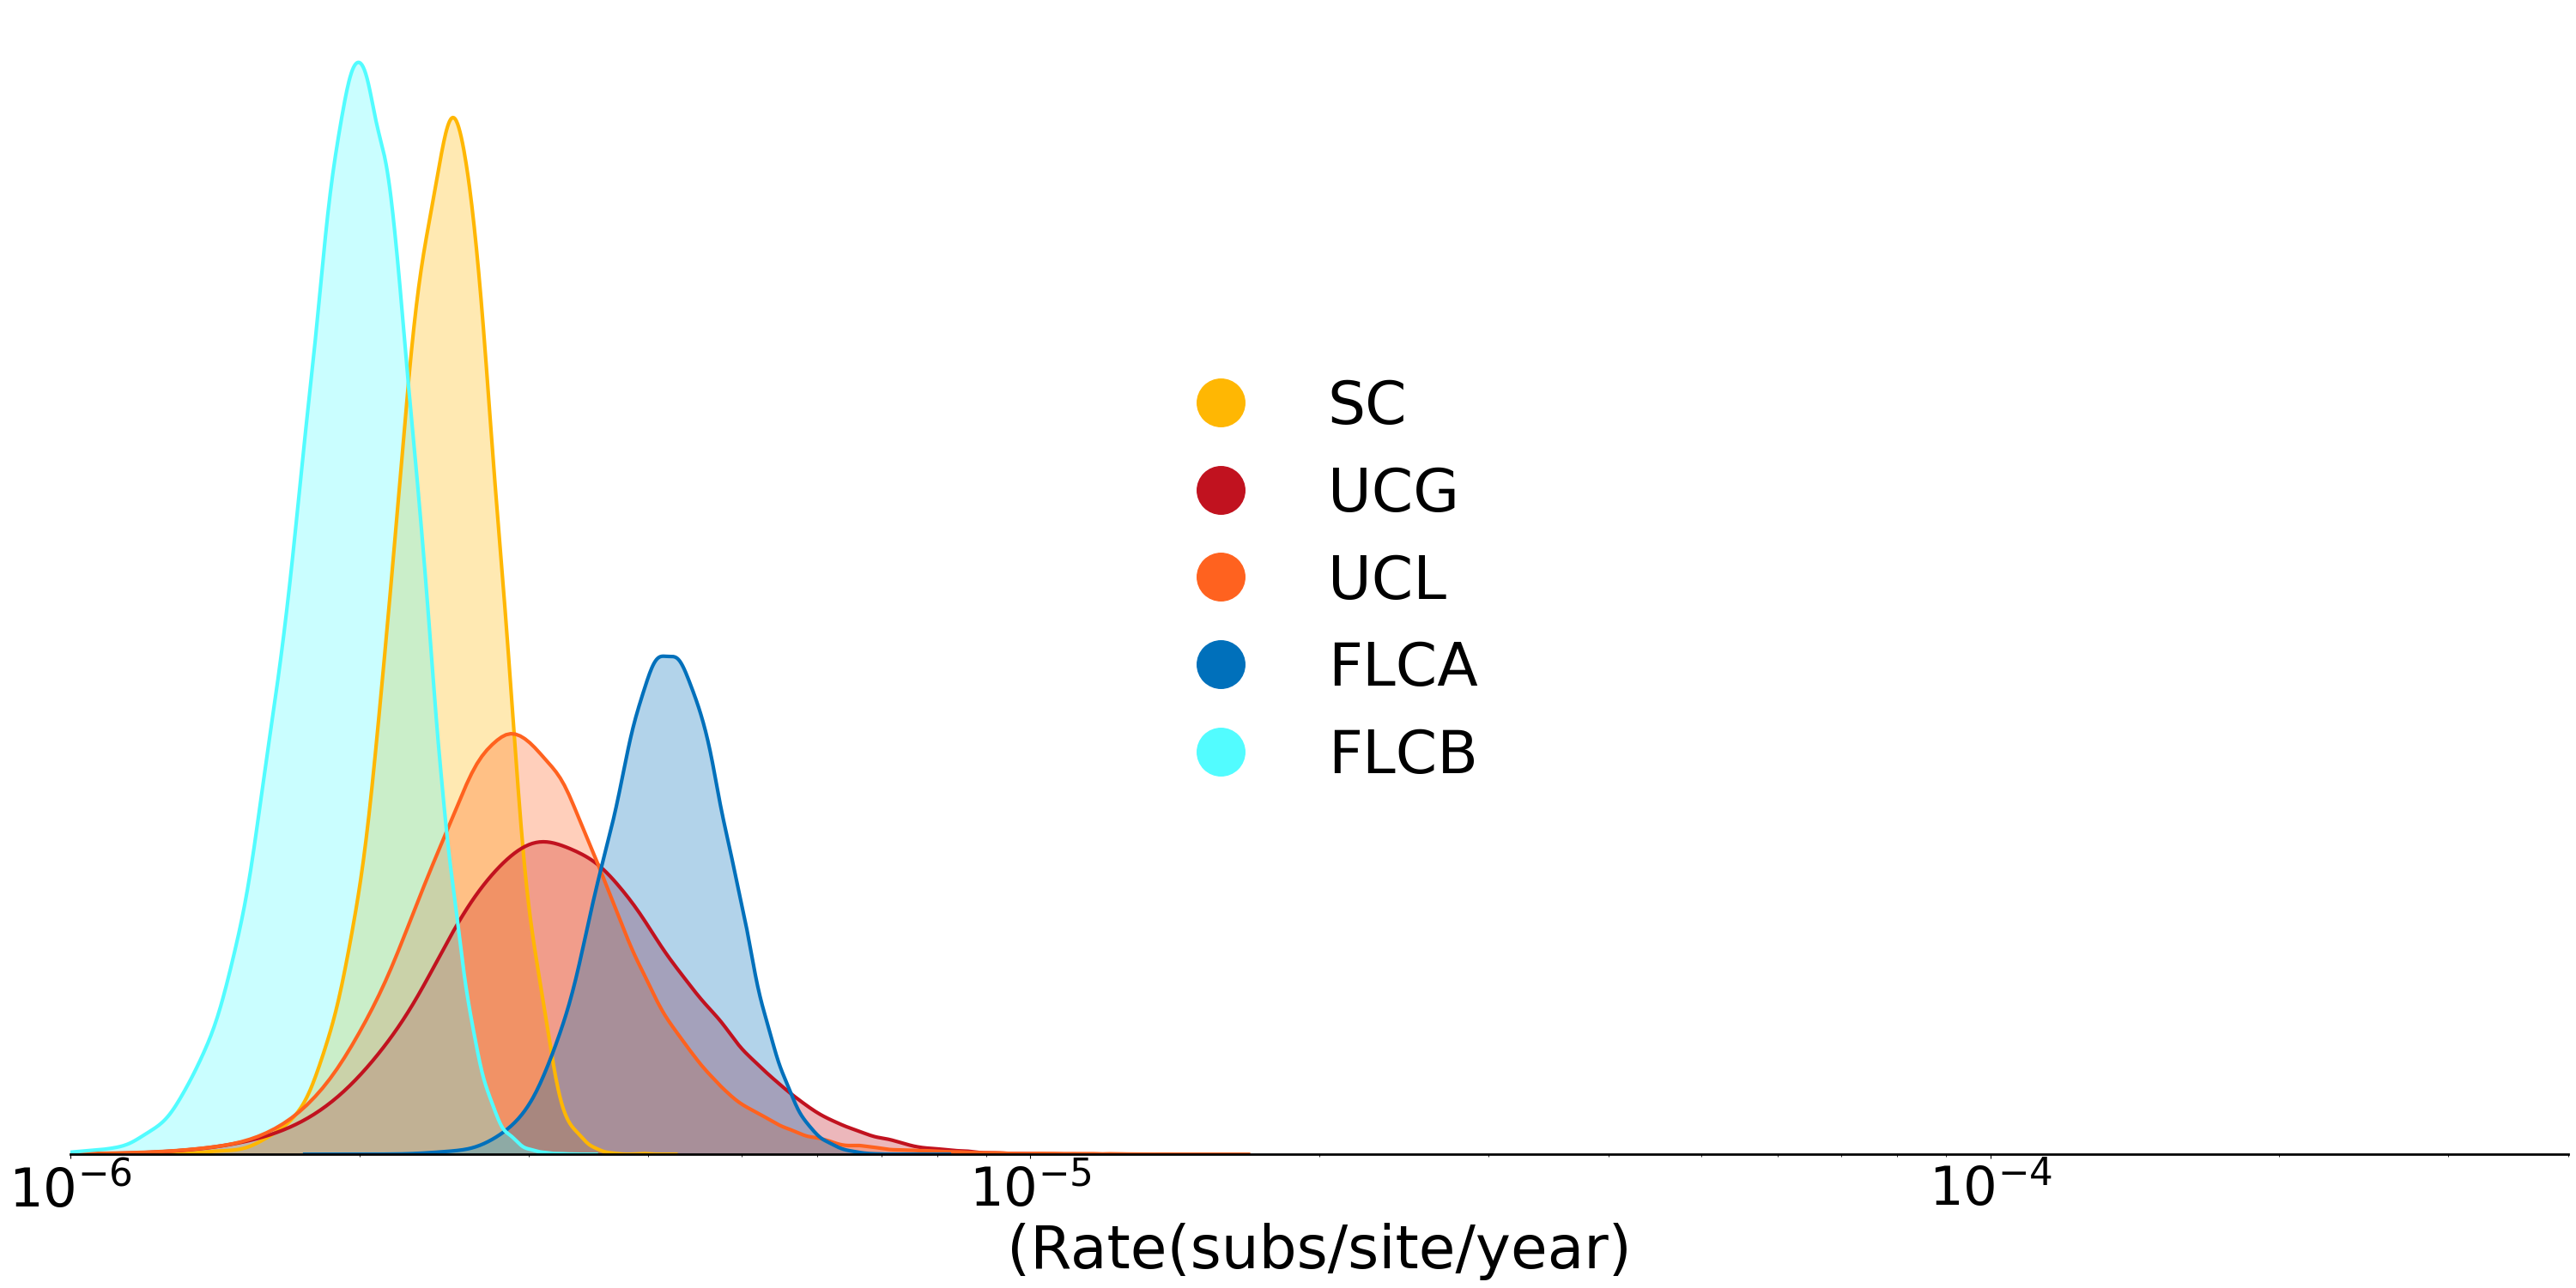

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(30, 15), facecolor='w', frameon=False)

# Load and plot each dataset
datasets = [
    ("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/SC-CLADEII.txt", '\t', "GSS_CladeIIA_B.log", "clock.rate", "#ffb703", "SC"),
    ("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/UCG_cladeII.txt", '\t', "GSS_UNCG_CladeIIA_B.log", "ucgd.mean", "#c1121f", "UCG"),
    ("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/UCL_cladeII.txt", '\t', "GSS_UNCG_CladeIIA_B.log", "ucld.mean", "#FF621F", "UCL"),
    ("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/cladeIIa.txt", '\t', "GSS_FLC_cladegamma_CladeIIA_B.log", "CladeIIA.rate", "#0070BB", "FLCA"),
    ("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/cladeIIB.txt", '\t', "GSS_FLC_cladegamma_CladeIIA_B.log", "clock.rate", "#52FCFF", "FLCB")
]

legend_handles = []  # List to hold the custom legend handles

for _, _, _, _, color, label in datasets:
    # Create circle markers for the legend
    handle = mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                           markersize=40, label=label)  # Adjust markersize as needed
    legend_handles.append(handle)

for path, delimiter, x_col, y_col, color, label in datasets:
    df = pd.read_csv(path, delimiter=delimiter)
    sns.lineplot(data=df, x=x_col, y=y_col, linewidth=3, color=color, label=label, ax=ax)
    plt.fill_between(df[x_col], 0, df[y_col], color=color, alpha=0.3)

# Log-transform the x-axis
ax.set_xscale('log')

# Remove the y-axis label and scale
ax.set_ylabel('')
ax.yaxis.set_visible(False)

# Add the custom legend to the plot, arranged vertically and closer
ax.legend(handles=legend_handles, frameon=False, fontsize=50, loc='center', ncol=1, bbox_to_anchor=(0.5, 0.5))

plt.xlim(1e-6, 0.0004)
plt.ylim(0)
plt.xlabel("(Rate(subs/site/year)", fontsize=50)
plt.xticks(fontsize=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_visible(False)
fig.tight_layout(pad=0.65)

# Save the plot
plt.savefig("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/density_clock_rate_skygrid.svg")
plt.savefig("../zoonosiclockrate/GSS_UCL_Single_CladeIIA-B/CladeA_B/density_clock_rate_skygrid.png")

plt.show()